In [2]:
from math import sqrt, exp
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

# Вариант 2

# 1)

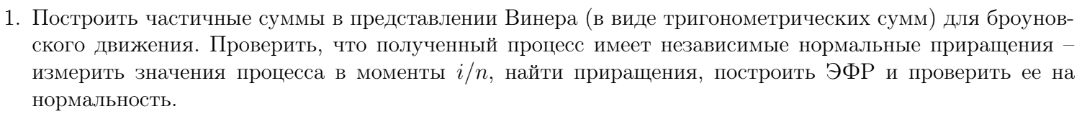

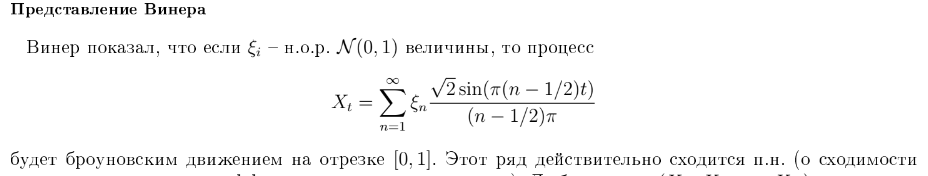

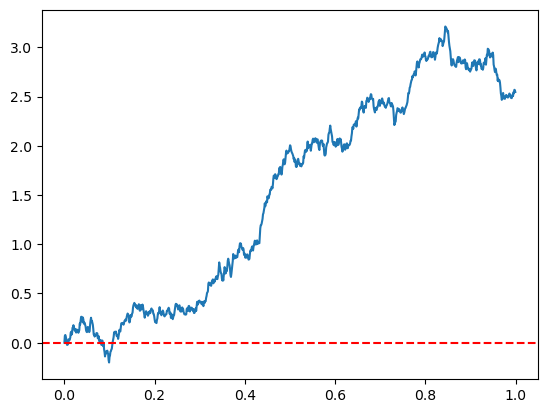

In [3]:
N = 1000
time = np.arange(0,1000)/1000
u = sts.norm.rvs(size = N)
i = 0
X = np.array([np.sum(np.array([u[j] * (2**0.5)* np.sin(np.pi*(j-1/2)*t)/((j-1/2)*np.pi) for j in range(N)])) for t in time])
plt.plot(time, X)
plt.axhline(y=0, color='r', linestyle='--')

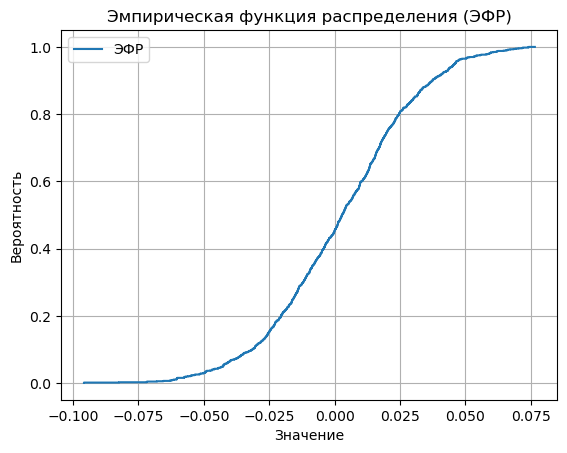

p-значение теста: 0.5683221220970154


In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

increments = np.diff(X)

ecdf = ECDF(increments)

# Построение графика
plt.step(ecdf.x, ecdf.y, label='ЭФР')

plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция распределения (ЭФР)')
plt.legend()
plt.grid(True)
plt.show()

# Проведение теста Шапиро-Уилка
statistic, p_value = sts.shapiro(increments)

print("p-значение теста:", p_value)

# Вывод: не отвергаем

---

# 2)

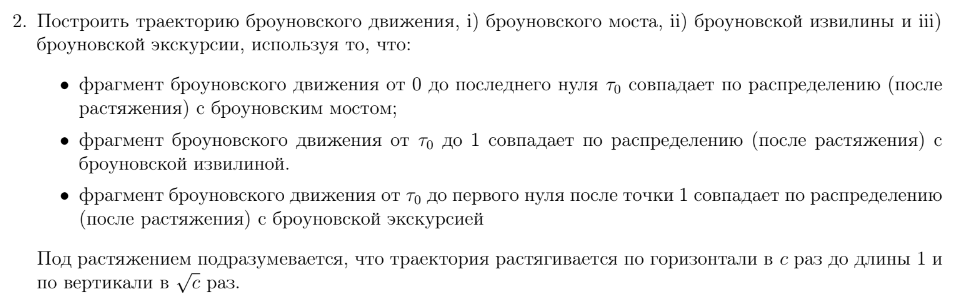

# Броуновская Извилина

In [19]:
n = 1000
X = np.empty(n)
Z = sts.norm().rvs(size=n)
for t in [i / n for i in range(n)]:
    X[int(t * n)] = Z.dot([np.sin(np.pi * i * t) / i for i in range(1 , n + 1)])

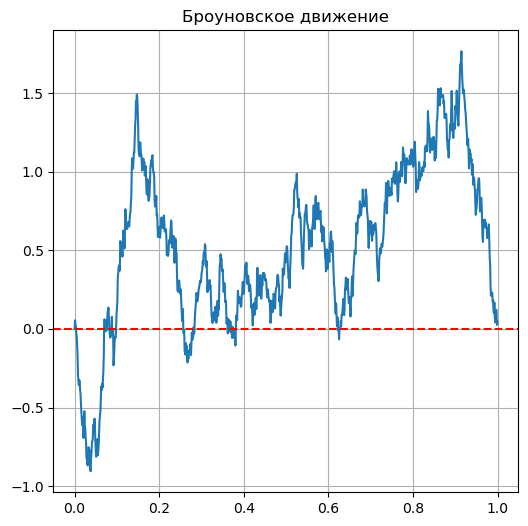

In [20]:
t = [i / n for i in range(n)]
plt.figure(figsize=(6, 6))
plt.plot(t, X)
plt.title('Броуновское движение')
plt.grid()
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

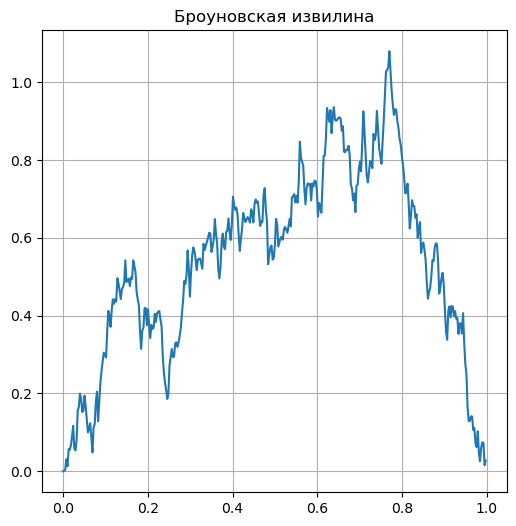

In [21]:

t0 = np.where(X[1 : len(X) - 1] * X[2:] < 0)[0][-1] + 1
t = [i / (n - t0) for i in range(n - t0)]
plt.figure(figsize=(6, 6))
plt.plot(t, np.sqrt((n - t0) / n) * np.hstack((0, X[t0 + 1:])))
plt.title('Броуновская извилина')
plt.grid()
plt.show()

# 3)

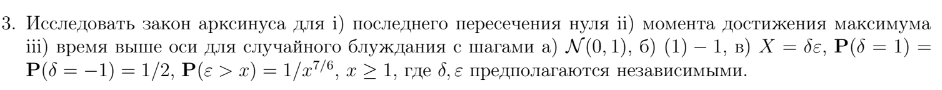

# пункт а)

In [55]:
def EDF(x: np.array, arr: np.array):
  return np.array(list([len(np.where(arr <= x[i])[0]) / len(arr) for i in range(len(x))]))

In [56]:
n = 1000
N = 1000

X = sts.norm().rvs(size = (N, n))

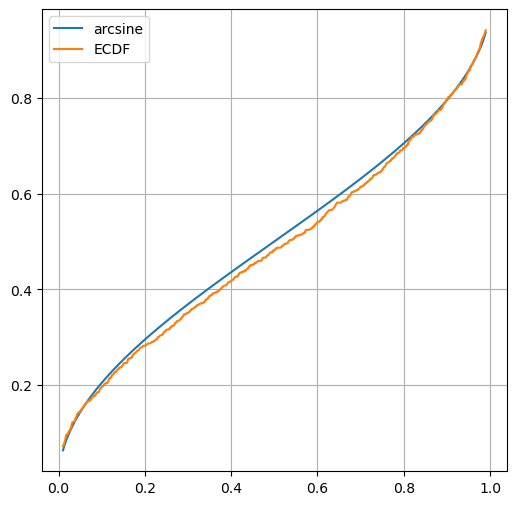

In [57]:
x = np.linspace(0.01, 0.99, 1000)
S = np.cumsum(X, axis=1)
t0 = np.array([np.argmax(S[i, :]) for i in range(N)]) / n

plt.figure(figsize = (6, 6))
plt.plot(x, sts.arcsine().cdf(x), label='arcsine')
plt.plot(x, EDF(x, t0), label='ECDF')
plt.grid()
plt.legend()
plt.show()

# пункт б)

In [58]:
n = 1000
N = 1000

In [59]:
X = np.random.choice([-1, 1], p = [1 / 2, 1 / 2], size = (N, n))

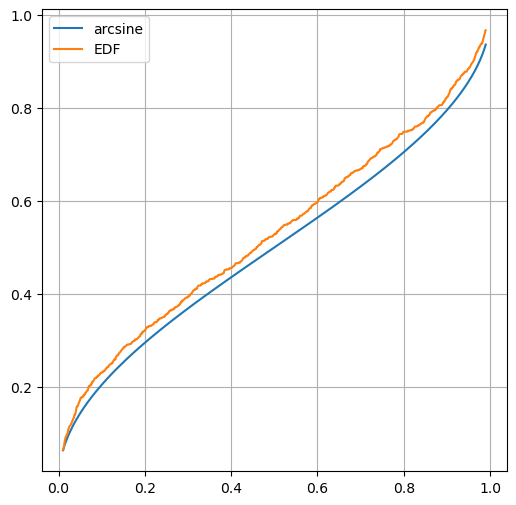

In [60]:
x = np.linspace(0.01, 0.99, 1000)
S = np.cumsum(X, axis=1)
t0 = np.array([np.argmax(S[i, :]) for i in range(N)]) / n

plt.figure(figsize = (6, 6))
plt.plot(x, sts.arcsine().cdf(x), label='arcsine')
plt.plot(x, EDF(x, t0), label='EDF')
plt.grid()
plt.legend()
plt.show()

In [64]:
n = 5000
N = 5000

In [65]:
R = sts.uniform().rvs(size = (N, n))
e = (1 / (1 - R)) ** (6 / 7)
delta = np.random.choice([-1, 1], p = [1 / 2, 1 / 2], size = (N, n))
X = delta * e

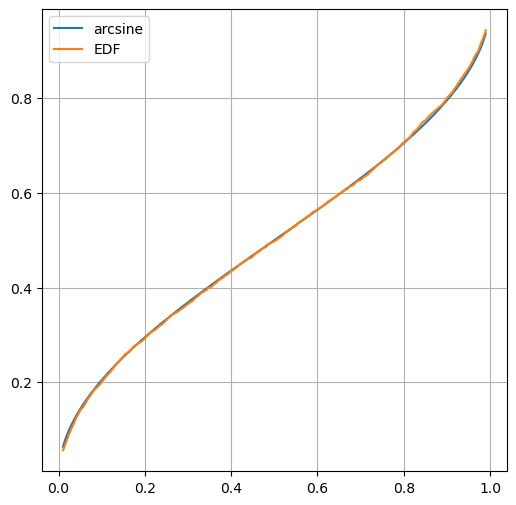

In [66]:
x = np.linspace(0.01, 0.99, 1000)
S = np.cumsum(X, axis=1)
t0 = np.array([np.argmax(S[i, :]) for i in range(N)]) / n

plt.figure(figsize = (6, 6))
plt.plot(x, sts.arcsine().cdf(x), label='arcsine')
plt.plot(x, EDF(x, t0), label='EDF')
plt.grid()
plt.legend()
plt.show()